In [ ]:
# 회귀와 예측
# 회귀 진단은 원래 데이터 분석을 위해 개발되었고, 이것이 발전하면서 비정상적인 데이터를
# 검출하는 데도 사용되고 있다.  (이상 검출 영역)


***4.1.1. 회귀식***

In [2]:
import pandas as pd
lung = pd.read_csv('/Users/wonbinchoi/current_studying/Practical_Statistics_for_Data_Scientists/data/LungDisease.csv')

In [6]:
from sklearn.linear_model import LinearRegression
predictors = ['Exposure']
outcome = 'PEFR'

model = LinearRegression()
model.fit(lung[predictors], lung[outcome])

print(f"Intercept: {model.intercept_:.3f}")
print(f"Coefficient Exposure: {model.coef_[0]:.3f}")


Intercept: 424.583
Coefficient Exposure: -4.185


In [10]:
fitted = model.predict(lung[predictors]) # 예측값
residuals = lung[outcome] - fitted


In [142]:
house = pd.read_csv('/Users/wonbinchoi/current_studying/Practical_Statistics_for_Data_Scientists/data/house_sales.csv', sep='\t')
columns = ['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
house[columns]

,AdjSalePrice,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade
1,300805.0,2400,9373,3.00,6,7
2,1076162.0,3764,20156,3.75,4,10
3,761805.0,2060,26036,1.75,4,8
4,442065.0,3200,8618,3.75,5,7
5,297065.0,1720,8620,1.75,4,7
...,...,...,...,...,...,...
27057,443803.0,1480,5468,1.75,3,7
27058,1586196.0,4720,23914,4.50,4,11
27061,220744.0,1070,11170,1.00,4,6
27062,342207.0,1345,6223,2.00,3,7


In [25]:
from sklearn.linear_model import LinearRegression
outcome = 'AdjSalePrice'
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

LinearRegression()

In [26]:
print('intercept :', lm_model.intercept_)
print('\ncoefficients : ')
for name, coef in zip(predictors, house_lm.coef_):
    print (f"{name} : {coef}")

intercept : -521871.368188284

coefficients : 
SqFtTotLiving : 228.8306036024083
SqFtLot : -0.0604668206530512
Bathrooms : -19442.840398320997
Bedrooms : -47769.955185214465
BldgGrade : 106106.96307898074


***4.2.2 모형평가***

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

fitted = house_lm.predict(house[predictors])
RMSE = np.sqrt(mean_squared_error(house[outcome], fitted))
r2 = r2_score(house[outcome], fitted)
print('RMSE : ', RMSE)
print('r2 score : ', r2)

RMSE :  261220.19743696266
r2 score :  0.5405875253381902


In [30]:
# t값과 F 통계량을 확인할 수 있는 statsmodels.api.OLS
# 데이터 과학자는 t값을 확인하여 해당 변수를 넣을지 말지를 결정할 수 있음. 
import statsmodels.api as sm

model = sm.OLS(house[outcome], house[predictors].assign(const=1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:58:02   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   228.8306      3.899     58.694      0.000     221.189     236.472
SqFtLot          -0.0605      0.061     -0.988      0.323      -0.180       0.059
Bathrooms     -1.944e+04   3625.388     -5.363      0.000   -2.65e+04   -1.23e+04
Bedrooms      -4.777e+04   2489.732    -19.187      0.000   -5.27e+04   -4.29e+04
BldgGrade      1.061e+05   2396.445     44.277      0.000    1.01e+05    1.11e+05
const         -5.219e+05   1.57e+04    -33.342      0.000   -5.53e+05   -4.91e+05
==============================================================================
Omnibus:                    29676.557   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19390738.346
Skew:                           6.889   Prob(JB):                         0.00
Kurtosis:                     145.559   Cond. No.                     2.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***다중 선형 회귀 4.2.4 모형 선택 및 단계적 회귀***

In [38]:
import statsmodels.api as sm

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade', 'PropertyType',
              'NbrLivingUnits', 'SqFtFinBasement', 'YrBuilt', 'YrRenovated', 'NewConstruction']
X = pd.get_dummies(house[predictors], drop_first=True) # drop_first = True 
                                                   # 첫번째 행 삭제 why? 나머지 행을 보고 유추가 가능하기 때문
X['NewConstruction'] = [1 if nc else 0 for nc in X['NewConstruction']] # boolean => 0,1로 변경

house_full = sm.OLS(house[outcome], X.assign(const=1))
results = house_full.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2771.
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:13:05   Log-Likelihood:            -3.1375e+05
No. Observations:               22687   AIC:                         6.275e+05
Df Residuals:                   22674   BIC:                         6.276e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
SqFtTotLiving                198.6364      4.234     46.920      0.000     190.338     206.934
SqFtLot                        0.0771      0.058      1.330      0.184      -0.037       0.191
Bathrooms                   4.286e+04   3808.114     11.255      0.000    3.54e+04    5.03e+04
Bedrooms                   -5.187e+04   2396.904    -21.638      0.000   -5.66e+04   -4.72e+04
BldgGrade                   1.373e+05   2441.242     56.228      0.000    1.32e+05    1.42e+05
NbrLivingUnits              5723.8438   1.76e+04      0.326      0.744   -2.87e+04    4.01e+04
SqFtFinBasement                7.0611      4.627      1.526      0.127      -2.009      16.131
YrBuilt                    -3574.2210     77.228    -46.282      0.000   -3725.593   -3422.849
YrRenovated                   -2.5311      3.924     -0.645      0.519     -10.222       5.160
NewConstruction            -2489.1122   5936.692     -0.419      0.675   -1.41e+04    9147.211
PropertyType_Single Family  2.997e+04   2.61e+04      1.149      0.251   -2.12e+04    8.11e+04
PropertyType_Townhouse      9.286e+04    2.7e+04      3.438      0.001    3.99e+04    1.46e+05
const                       6.182e+06   1.55e+05     39.902      0.000    5.88e+06    6.49e+06
==============================================================================
Omnibus:                    31006.128   Durbin-Watson:                   1.393
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         26251977.078
Skew:                           7.427   Prob(JB):                         0.00
Kurtosis:                     168.984   Cond. No.                     2.98e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
from dmba import AIC_score, stepwise_selection

y = house[outcome]
X = pd.get_dummies(house[predictors], drop_first=True)

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X[variables], y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y, [y.mean()]*len(y), model, df=1)
    return AIC_score(y, model.predict(X[variables]), model)
    
best_model, best_variables = stepwise_selection(X.columns, train_model, score_model, verbose=True)

print("\nintercept : {:3f}".format(best_model.intercept_))
print("\nCoeffcients")
for name, coef in zip(best_variables, best_model.coef_):
    print("{} : {}".format(name, coef))

Variables: SqFtTotLiving, SqFtLot, Bathrooms, Bedrooms, BldgGrade, NbrLivingUnits, SqFtFinBasement, YrBuilt, YrRenovated, NewConstruction, PropertyType_Single Family, PropertyType_Townhouse
Start: score=647988.32, constant
Step: score=633013.35, add SqFtTotLiving
Step: score=630793.74, add BldgGrade
Step: score=628230.29, add YrBuilt
Step: score=627784.16, add Bedrooms
Step: score=627602.21, add Bathrooms
Step: score=627525.65, add PropertyType_Townhouse
Step: score=627525.08, add SqFtFinBasement
Step: score=627524.98, add PropertyType_Single Family
Step: score=627524.98, unchanged None

intercept : 6178645.017033
Coeffcients
SqFtTotLiving : 199.27755304201781
BldgGrade : 137159.56022619802
YrBuilt : -3565.424939249281
Bedrooms : -51947.38367361341
Bathrooms : 42396.16452771811
PropertyType_Townhouse : 84479.16203300335
SqFtFinBasement : 7.046974967583083
PropertyType_Single Family : 22912.055187017646


***가중회귀***

In [65]:
house['Year'] = [int(date.split('-')[0]) for date in house.DocumentDate]
house['Weight'] = house.Year - 2005

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_wt = LinearRegression()
house_wt.fit(house[predictors], house[outcome], sample_weight=house['Weight'])

fitted = house_wt.predict(house[predictors])

print(r2_score(house[outcome], fitted)) 

"""
위의 처음모델과 비교하여 r2_score가 줄어들음??
"""

0.5381648454281939


***4.4.1 가변수 표현***

In [72]:
pd.get_dummies(house['PropertyType'])
pd.get_dummies(house['PropertyType'], drop_first=True) # 이렇게 해야 다중 공선성 문제를 피할 수 있음. 

,Single Family,Townhouse
1,0,0
2,1,0
3,1,0
4,1,0
5,1,0
...,...,...
27057,1,0
27058,1,0
27061,1,0
27062,1,0


In [88]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade', 
              'PropertyType']
X = pd.get_dummies(house[predictors], drop_first=True)

house_lm = LinearRegression()
house_lm.fit(X, house[outcome])

print('intercept : ', house_lm_factor.intercept_)
print('\ncoeffecieints : ')
for name, coef in zip(X.columns, house_lm_factor.coef_):
    print ("{} : {}".format(name, coef))

intercept :  -446841.36631167436

coeffecieints : 
SqFtTotLiving : 223.37362892503862
SqFtLot : -0.0703679813681326
Bathrooms : -15979.013473414965
Bedrooms : -50889.73218483036
BldgGrade : 109416.30516146174
PropertyType_Single Family : -84678.21629549288
PropertyType_Townhouse : -115121.97921609206


***4.4.2 다수의 수준을 갖는 요인변수들***

In [83]:
# 자유도는 79에 해당하는 79개의 계수가 필요
# Zipcode는 주택 가격에 대한 위치의 효과를 볼 수 있는 중요한 변수 
pd.DataFrame(house['ZipCode'].value_counts()).shape

(80, 1)

In [137]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade', 
              'PropertyType']
X = pd.get_dummies(house[predictors], drop_first=True)

house_lm = LinearRegression()
house_lm.fit(X, house[outcome])

zip_groups = pd.DataFrame([
*pd.DataFrame({
    'ZipCode' : house['ZipCode'],
    'residual' : house[outcome] - house_lm.predict(X)
}).groupby('ZipCode').apply(lambda x : {'ZipCode' : x.iloc[0,0],
                                        'count' : len(x),
                                        'median_residual': x.residual.median()})]).sort_values('median_residual')
zip_groups

,ZipCode,count,median_residual
36,98057,4,-538938.746571
27,98043,1,-304848.132844
46,98092,289,-195063.801799
23,98038,788,-148401.858065
31,98051,32,-142571.462708
...,...,...,...
60,98119,260,172736.205653
54,98112,357,234375.837866
25,98040,244,250438.973697
3,98004,293,381674.018349


In [138]:
zip_groups['cum_count'] = np.cumsum(zip_groups['count'])
zip_groups

,ZipCode,count,median_residual,cum_count
36,98057,4,-538938.746571,4
27,98043,1,-304848.132844,5
46,98092,289,-195063.801799,294
23,98038,788,-148401.858065,1082
31,98051,32,-142571.462708,1114
...,...,...,...,...
60,98119,260,172736.205653,21746
54,98112,357,234375.837866,22103
25,98040,244,250438.973697,22347
3,98004,293,381674.018349,22640


In [139]:
zip_groups['ZipGroup'] = pd.qcut(zip_groups['cum_count'], 5, labels=False, retbins=False)

In [140]:
to_join = zip_groups[['ZipCode', 'ZipGroup']].set_index('ZipCode')
house = house.join(to_join, on='ZipCode')
house['ZipGroup'] = house['ZipGroup'].astype('category')

***4.5.1 예측변수간 상관***

In [77]:
# 침실 개수를 뜻하는 Bedrooms의 계수가 음수 ==> 침실 개수를 늘릴 수록 그 가치가 감소한다는 뜻
# why? 예측 변수들이 서로 연관되어 있음.
# 침실 수, 평 수, 욕실 수에 대한 변수들은 모두 상관관계가 있음. 
# 몇가지 변수들을 제거하고 다시 모델링

predictors = ['Bedrooms', 'BldgGrade', 'PropertyType', 'YrBuilt']
outcome = 'AdjSalePrice'

X = pd.get_dummies(house[predictors], drop_first=True)

reduced_lm = LinearRegression()
reduced_lm.fit(X, house[outcome])

LinearRegression()

***4.5.2 다중공선성***

In [ ]:
# 회귀분석에서는 다중공선성 문제를 반드시 해결해야 한다.
# 다중공선성이 사라질 때까지 변수를 제거해야 한다. 
# 완전 다중공선성이 존재하는 상황에서는 회귀를 통해 제대로 된 답을 얻을 수 없다. 

***4.5.3 교란변수***

In [130]:
# 회귀 방정식에 중요한 변수가 포함되지 못해서 생기는 누락의 문제
# 여기서는 우편번호 (위치 변수)
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade', 
              'PropertyType', 'ZipGroup']
outcome = 'AdjSalePrice'

X = pd.get_dummies(house[predictors], drop_first=True)

confounding_lm = LinearRegression()
confounding_lm.fit(X, house[outcome])

print('intercept: ', confounding_lm.intercept_)
print('\nCoeffcients : ')
for name, coef in zip(X.columns, confounding_lm.coef_):
    print ("{} : {}".format(name, coef))

intercept:  -714107.1965514625

Coeffcients : 
SqFtTotLiving : 210.208777344908
SqFtLot : 0.41592886950448715
Bathrooms : 7795.793532553715
Bedrooms : -41554.5360359692
BldgGrade : 102655.1406774694
ZipGroup : 80679.18338328566
PropertyType_Single Family : 11281.964578595109
PropertyType_Townhouse : -89312.26236012837


***상호작용과 주효과***

In [141]:
import statsmodels.formula.api as smf

model = smf.ols(formula='AdjSalePrice ~ SqFtTotLiving*ZipGroup + SqFtLot + Bathrooms \
                        + Bedrooms + BldgGrade + PropertyType', data=house)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     3236.
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:50:38   Log-Likelihood:            -3.1101e+05
No. Observations:               22687   AIC:                         6.221e+05
Df Residuals:                   22671   BIC:                         6.222e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -4.879e+05   2.05e+04    -23.813      0.000   -5.28e+05   -4.48e+05
ZipGroup[T.1]                 -1.452e+04    1.3e+04     -1.120      0.263   -3.99e+04    1.09e+04
ZipGroup[T.2]                  2.161e+04   1.21e+04      1.785      0.074   -2121.066    4.53e+04
ZipGroup[T.3]                  7323.1835   1.21e+04      0.604      0.546   -1.64e+04    3.11e+04
ZipGroup[T.4]                 -1.527e+05   1.12e+04    -13.589      0.000   -1.75e+05   -1.31e+05
PropertyType[T.Single Family]  1.322e+04   1.39e+04      0.949      0.343   -1.41e+04    4.05e+04
PropertyType[T.Townhouse]      -5.86e+04   1.52e+04     -3.867      0.000   -8.83e+04   -2.89e+04
SqFtTotLiving                   114.4857      4.867     23.521      0.000     104.945     124.026
SqFtTotLiving:ZipGroup[T.1]      36.4813      5.488      6.648      0.000      25.725      47.237
SqFtTotLiving:ZipGroup[T.2]      41.2295      5.364      7.686      0.000      30.716      51.743
SqFtTotLiving:ZipGroup[T.3]      76.1137      5.584     13.630      0.000      65.168      87.059
SqFtTotLiving:ZipGroup[T.4]     228.1176      4.825     47.280      0.000     218.661     237.575
SqFtLot                           0.7172      0.052     13.859      0.000       0.616       0.819
Bathrooms                     -5118.4136   3205.231     -1.597      0.110   -1.14e+04    1164.060
Bedrooms                      -4.154e+04   2123.239    -19.566      0.000   -4.57e+04   -3.74e+04
BldgGrade                      1.054e+05   2069.829     50.929      0.000    1.01e+05    1.09e+05
==============================================================================
Omnibus:                    30737.778   Durbin-Watson:                   1.583
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         33537624.445
Skew:                           7.193   Prob(JB):                         0.00
Kurtosis:                     190.807   Cond. No.                     5.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***4.6.1 특잇값***

In [162]:
# (표준화)잔차를 통하여 특잇값을 검출하는데 활용할 수 있음. 
import statsmodels.api as sm
house_98105 = house.loc[house['ZipCode'] == 98105]

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_outlier = sm.OLS(house_98105[outcome], house_98105[predictors].assign(const=1))
result_98105 = house_outlier.fit()

# 잔차 분석을 위한 OLSInfluence메소드 사용
from statsmodels.stats.outliers_influence import OLSInfluence
influence = OLSInfluence(result_98105) # 위에서 fit한 모델을 가져옴. 
sresiduals = influence.resid_studentized_internal
sresiduals.idxmin(), sresiduals.min()

outlier = house_98105.loc[sresiduals.idxmin(), :] # 데이터 프레임에 인덱스를 찍어서 활용하는 것으로 보임. 
print('AdjSalePrice', outlier[outcome])
print(outlier[predictors])

AdjSalePrice 119748.0
SqFtTotLiving    2900
SqFtLot          7276
Bathrooms         3.0
Bedrooms            6
BldgGrade           7
Name: 24333, dtype: object


***영향값***

Text(0, 0.5, 'studentized residuals')

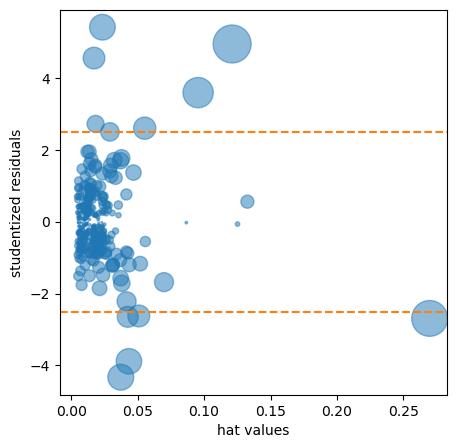

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 표준화 잔차, 햇 값, 쿸의 거리를 모두 보여주는 그래프


influence = OLSInfluence(result_98105) # 회귀에 fit한 결과를 넣어줌
fig, ax = plt.subplots(figsize=(5,5))
ax.axhline(-2.5, linestyle='--', color='C1')
ax.axhline(2.5, linestyle='--', color='C1')

ax.scatter(influence.hat_matrix_diag, influence.resid_studentized_internal,
           s=1000*np.sqrt(influence.cooks_distance[0]),
           alpha=.5)
ax.set_xlabel('hat values')
ax.set_ylabel('studentized residuals')

***4.6.3 이분산성, 비정규성, 오차 간 상관***

Text(0, 0.5, 'abs(residual)')

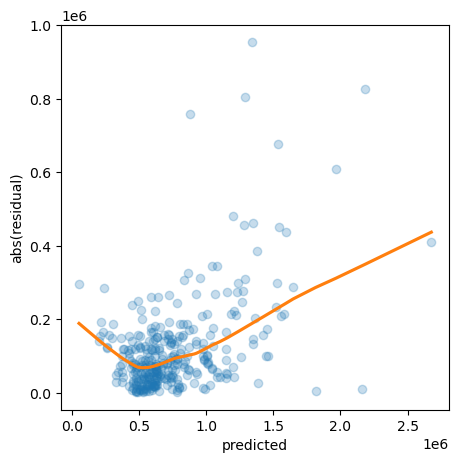

In [160]:
# 이분산성
# 잔차의 절댓값과 예측값에 대한 산점도 
# 데이터 과학자가 알아야 하는 이유?
# 이분상성은 예측값이 어떤 경우에는 맞고 어떤 경우에는 틀리다는 것을 나타냄, 얻은 모델이 불완전하다는 것을 알려줌
# 여기서의 그래프는 잔차의 분산은 저가, 고가의 주택일수록 증가하는 경향이 있음 ==> 이분산성의 오차. 

fig, ax = plt.subplots(figsize=(5,5))
sns.regplot(
    x = result_98105.fittedvalues, y = np.abs(result_98105.resid),
    scatter_kws = {'alpha':.25}, line_kws = {'color':'C1'},
    lowess=True, ax=ax
)
ax.set_xlabel('predicted')
ax.set_ylabel('abs(residual)')

***4.6.4 편잔차 그림과 비선형성***

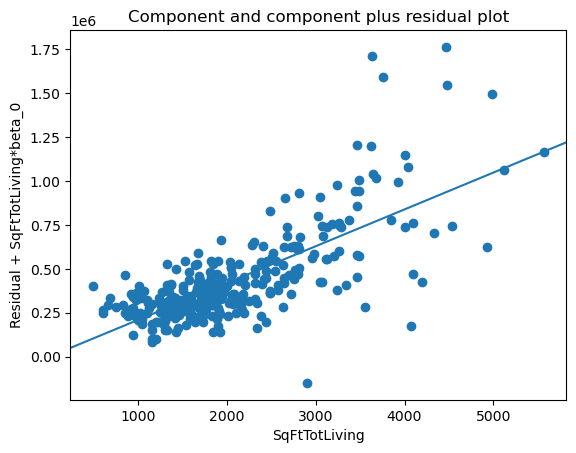

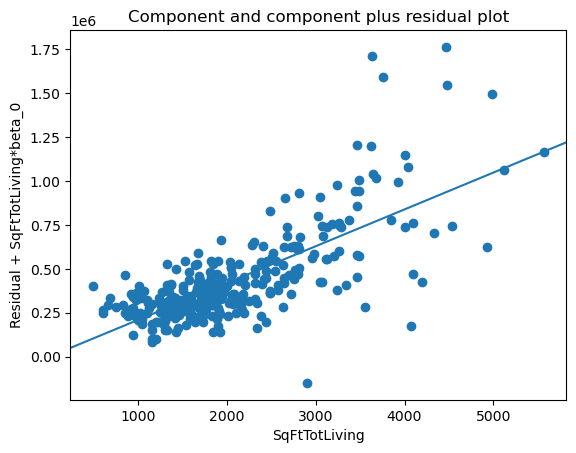

In [164]:
# 편잔차그림은 예측 모델이 예측변수와 결과변수 간의 관계를 얼마나 잘 설명하는지를 시각화하는 그림
import statsmodels.api as sm
sm.graphics.plot_ccpr(result_98105, 'SqFtTotLiving')